In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

### 1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.

In [2]:
# Reading the Data file
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


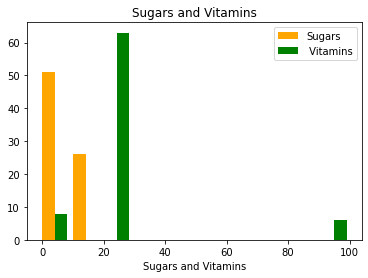

In [5]:
plt.hist([df["sugars"], df["vitamins"]],
         color=['orange', 'green'])
plt.title("Sugars and Vitamins")
plt.xlabel("Sugars and Vitamins")
plt.legend(["Sugars", " Vitamins"])
plt.show()

### 2. The names of the manufactures are coded using alphabets, create a new column with their full name using the below mapping.
'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'

Create a bar plot where each manufacturer is on the x axis and the height of the bars depict the number of cereals manufactured by them.

In [6]:
mfg_dict = {'N': 'Nabisco', 
            'Q': 'Quaker Oats', 
            'K': 'Kelloggs', 
            'R': 'Raslston Purina', 
            'G': 'General Mills' , 
            'P' :'Post' , 
            'A':'American Home Foods Products'}
df["manufactures"] = [mfg_dict[mfr] for mfr in df["mfr"]]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufactures
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


In [7]:
grouped_mfr = df.groupby(["manufactures"], as_index=False).count()
x = grouped_mfr["manufactures"]
y = grouped_mfr["mfr"]
print(grouped_mfr)

                   manufactures  name  mfr  type  calories  protein  fat  \
0  American Home Foods Products     1    1     1         1        1    1   
1                 General Mills    22   22    22        22       22   22   
2                      Kelloggs    23   23    23        23       23   23   
3                       Nabisco     6    6     6         6        6    6   
4                          Post     9    9     9         9        9    9   
5                   Quaker Oats     8    8     8         8        8    8   
6               Raslston Purina     8    8     8         8        8    8   

   sodium  fiber  carbo  sugars  potass  vitamins  shelf  weight  cups  rating  
0       1      1      1       1       1         1      1       1     1       1  
1      22     22     22      22      22        22     22      22    22      22  
2      23     23     23      23      23        23     23      23    23      23  
3       6      6      6       6       6         6      6       6   

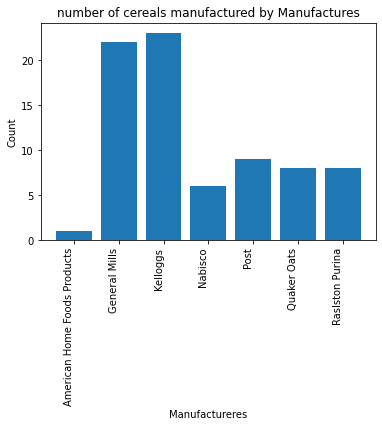

In [8]:
plt.bar(x, y)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel("Manufactureres")
plt.ylabel("Count")
plt.title("number of cereals manufactured by Manufactures")
plt.show()

### 3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.

In [9]:
df1 = df.copy()

In [10]:
df1.drop(['name','mfr','type','manufactures'], axis=1, inplace=True)
df1.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
x_test.shape

(20, 12)

### 4. Fit a linear regression module and measure the mean squared error on test dataset.

In [14]:
# Creating linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

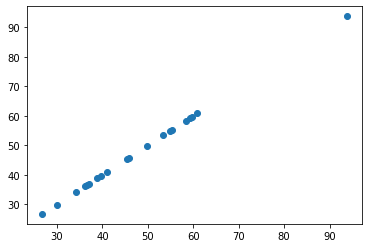

In [15]:
# Predicting output and evaluating the model
predicted_ratings = linear_reg.predict(x_test)
plt.scatter(np.array(predicted_ratings), np.array(y_test))
plt.show()

Showing confusion matrix, accuracy score
- y_test and predicted_ratings are continuous variable and metrics are used to predict classification variables.

In [16]:
print("MSE",mean_squared_error(y_test,predicted_ratings))

MSE 1.4013892922467724e-13
